# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Ingest Data  

In [15]:
df = pd.read_excel("World military power.xlsx",header=[0,1])

In [16]:
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


# EDA

## Implement basic steps to see how is your data looks like

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [18]:
df.describe().T

count         mean  \
2020 ranking      Military Strength Power Index            138.0     1.460716   
Airforce Strength Aircraft Strength value                  138.0   388.471014   
                  Fighter/Interceptor Strength value       138.0    81.565217   
                  Attack Aircraft Strength value           138.0    25.760870   
                  Transport Aircraft Fleet Strength value  138.0    30.231884   
                  Trainer Aircraft Fleet value             138.0    82.833333   
                  Helicopter Fleet Strength value          138.0   154.065217   
                  Attack Helicopter Fleet Strength value   138.0    25.623188   
Land Strength     Tank Strength value                      138.0   646.565217   
                  AFV/APC Strength value                   138.0  2485.695652   
                  Self-Propelled Artillery Strength value  138.0   212.159420   
                  Towed Artillery Strength value           138.0   393.978261   
                  Rocket Projector Strength value          138.0   156.934783   
Navy Strength     Navy Fleet Strengths value               124.0    84.983871   
                  Aircraft Carrier Fleet Strength value    115.0     0.382609   
                  Submarine Fleet Strength value           115.0     4.800000   
                  Destroyer Fleet Strength value           115.0     2.052174   
                  Frigate Fleet Strength value             115.0     3.521739   
Logistics         Airport Totals value                     138.0   290.043478   
Geography         Total Border Coverage value              129.0  3964.224806   

                                                                   std  \
2020 ranking      Military Strength Power Index               1.324018   
Airforce Strength Aircraft Strength value                  1231.981859   
                  Fighter/Interceptor Strength value        230.324777   
                  Attack Aircraft Strength value             94.528222   
                  Transport Aircraft Fleet Strength value    92.330436   
                  Trainer Aircraft Fleet value              240.803721   
                  Helicopter Fleet Strength value           520.183631   
                  Attack Helicopter Fleet Strength value     97.326091   
Land Strength     Tank Strength value                      1515.463683   
                  AFV/APC Strength value                   5410.546392   
                  Self-Propelled Artillery Strength value   688.028987   
                  Towed Artillery Strength value            805.781703   
                  Rocket Projector Strength value           484.380984   
Navy Strength     Navy Fleet Strengths value                146.114165   
                  Aircraft Carrier Fleet Strength value       1.971653   
                  Submarine Fleet Strength value             13.706958   
                  Destroyer Fleet Strength value             10.000740   
                  Frigate Fleet Strength value                6.481211   
Logistics         Airport Totals value                     1212.967393   
Geography         Total Border Coverage value              3760.099671   

                                                               min        25%  \
2020 ranking      Military Strength Power Index             0.0606     0.5748   
Airforce Strength Aircraft Strength value                   0.0000    33.0000   
                  Fighter/Interceptor Strength value        0.0000     0.0000   
                  Attack Aircraft Strength value            0.0000     0.0000   
                  Transport Aircraft Fleet Strength value   0.0000     3.0000   
                  Trainer Aircraft Fleet value              0.0000     4.2500   
                  Helicopter Fleet Strength value           0.0000    15.2500   
                  Attack Helicopter Fleet Strength value    0.0000     0.0000   
Land Strength     Tank Strength value                       0.0000    19.

In [19]:
df.shape

(138, 60)

In [22]:
df.duplicated().sum()

0

In [26]:
df.isnull().sum().any()

True

## Convert multi index columns to one level

In [29]:
df.columns

MultiIndex([(     '2020 ranking',                       'Military Strength'),
            (     '2020 ranking',           'Military Strength Power Index'),
            ('Airforce Strength',                       'Aircraft Strength'),
            ('Airforce Strength',                 'Aircraft Strength value'),
            ('Airforce Strength',            'Fighter/Interceptor Strength'),
            ('Airforce Strength',      'Fighter/Interceptor Strength value'),
            ('Airforce Strength',                'Attack Aircraft Strength'),
            ('Airforce Strength',          'Attack Aircraft Strength value'),
            ('Airforce Strength',       'Transport Aircraft Fleet Strength'),
            ('Airforce Strength', 'Transport Aircraft Fleet Strength value'),
            ('Airforce Strength',                  'Trainer Aircraft Fleet'),
            ('Airforce Strength',            'Trainer Aircraft Fleet value'),
            ('Airforce Strength',               'Helicopter Flee

In [30]:
df.columns =  df.columns.get_level_values(0)+ " "+ df.columns.get_level_values(1)# multi index to single index

In [31]:
df.head()

,2020 ranking Military Strength,2020 ranking Military Strength Power Index,Airforce Strength Aircraft Strength,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength,Airforce Strength Transport Aircraft Fleet Strength value,...,Manpower Total Population,Manpower Total Population value,Geography Total Square Land Area,Geography Total Square Land Area value,Geography Total Coastline Coverage,Geography Total Coastline Coverage value,Geography Total Waterway Coverage,Geography Total Waterway Coverage value,Geography Total Border Coverage,Geography Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


## Detect and drop duplicated columns

In [32]:
# As you can see, the columns not containing value are duplicated.
cols= []
for i in df.columns:
    if "value" in i:
        cols.append(i)
cols

['Airforce Strength Aircraft Strength value',
 'Airforce Strength Fighter/Interceptor Strength value',
 'Airforce Strength Attack Aircraft Strength value',
 'Airforce Strength Transport Aircraft Fleet Strength value',
 'Airforce Strength Trainer Aircraft Fleet value',
 'Airforce Strength Helicopter Fleet Strength value',
 'Airforce Strength Attack Helicopter Fleet Strength value',
 'Land Strength Tank Strength value',
 'Land Strength AFV/APC Strength value',
 'Land Strength Self-Propelled Artillery Strength value',
 'Land Strength Towed Artillery Strength value',
 'Land Strength Rocket Projector Strength value',
 'Navy Strength Navy Fleet Strengths value',
 'Navy Strength Aircraft Carrier Fleet Strength value',
 'Navy Strength Submarine Fleet Strength value',
 'Navy Strength Destroyer Fleet Strength value',
 'Navy Strength Frigate Fleet Strength value',
 'Finances defense spending budget value',
 'Finances External Debt value',
 'Logistics Airport Totals value',
 'Natural resources Oil

In [33]:
df2 = df[cols]  # df 0 and 1 cols are not in df2, so wee will add them.
df2.insert(0, "country",df["2020 ranking Military Strength"])
df2.insert(1, "Military Strength Power Index", df["2020 ranking Military Strength Power Index"])
df2.head()

,country,Military Strength Power Index,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,...,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


### Finally we got a clean dataframe structure

## Check for missing values 

In [34]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df2)

Your selected dataframe has 31 columns and 138 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
Geography Total Coastline Coverage value,1,29,21.0,30,21.7,object
Navy Strength Aircraft Carrier Fleet Strength value,102,23,16.7,125,90.6,float64
Navy Strength Submarine Fleet Strength value,74,23,16.7,97,70.3,float64
Navy Strength Destroyer Fleet Strength value,103,23,16.7,126,91.3,float64
Navy Strength Frigate Fleet Strength value,61,23,16.7,84,60.9,float64
Navy Strength Navy Fleet Strengths value,14,14,10.1,28,20.3,float64
Geography Total Border Coverage value,0,9,6.5,9,6.5,float64


## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [35]:
df2.head()

,country,Military Strength Power Index,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,...,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


In [36]:
# we check missing values with Country Geograpy for Navy Force   
df2.loc[df["Geography Total Coastline Coverage value"].isnull(), ['country',
                                                                             'Navy Strength Navy Fleet Strengths value',
                                                                             'Navy Strength Aircraft Carrier Fleet Strength value',
                                                                             'Navy Strength Submarine Fleet Strength value',
                                                                             'Navy Strength Destroyer Fleet Strength value',
                                                                             'Navy Strength Frigate Fleet Strength value',
                                                                             'Geography Total Waterway Coverage value']]

,country,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value,Geography Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


## According to the research on wikipedia, the following countries are not landlocked, so we change the NaN values to "0".

In [37]:
# Change zero "0"  missing values, 
df2.loc[df["Geography Total Coastline Coverage value"].isnull(),
    
    ['Navy Strength Navy Fleet Strengths value',
     'Navy Strength Aircraft Carrier Fleet Strength value',
     'Navy Strength Submarine Fleet Strength value',
     'Navy Strength Destroyer Fleet Strength value',
     'Navy Strength Frigate Fleet Strength value']
    
    ] = 0

In [38]:
df2.loc[df['Navy Strength Aircraft Carrier Fleet Strength value'].isnull()|
             df['Navy Strength Submarine Fleet Strength value'].isnull()|
             df['Navy Strength Destroyer Fleet Strength value'].isnull()|
             df['Navy Strength Frigate Fleet Strength value'].isnull()  |
             df['Navy Strength Navy Fleet Strengths value'].isnull()] 

,country,Military Strength Power Index,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,...,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,...,52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,...,59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,...,128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0
38,Ethiopia,0.8581,86.0,24.0,0.0,9.0,20.0,33.0,8.0,400.0,...,57.0,0.0,55000.0,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.0


In [39]:
df2.loc[df2["country"]=="Uzbekistan",
            ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]]

,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [40]:
# Uzbekistan has not navy 
df2.loc[df2["country"] == "Uzbekistan",
            ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]] = 0

In [41]:
# Sout Korea have navy force bur there are some missing values
df2.loc[df2["country"] == "South Korea",
            ['Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]]

,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [42]:
df2.loc[((df2['Navy Strength Navy Fleet Strengths value'] > 200) & 
             (df2['Navy Strength Navy Fleet Strengths value'] < 250)),
            ['country',
             'Navy Strength Navy Fleet Strengths value',
             'Navy Strength Aircraft Carrier Fleet Strength value',
             'Navy Strength Submarine Fleet Strength value',
             'Navy Strength Destroyer Fleet Strength value',
             'Navy Strength Frigate Fleet Strength value',
           ]] 

,country,Navy Strength Navy Fleet Strengths value,Navy Strength Aircraft Carrier Fleet Strength value,Navy Strength Submarine Fleet Strength value,Navy Strength Destroyer Fleet Strength value,Navy Strength Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [43]:
# South Korea Navy wikipeida page

df2.loc[df2["country"] == "South Korea",'Navy Strength Aircraft Carrier Fleet Strength value'] = 2
df2.loc[df2["country"] == "South Korea",'Navy Strength Submarine Fleet Strength value'] = 19
df2.loc[df2["country"] == "South Korea",'Navy Strength Destroyer Fleet Strength value'] = 12
df2.loc[df2["country"] == "South Korea",'Navy Strength Frigate Fleet Strength value'] = 12

In [44]:
df2.loc[df['Geography Total Coastline Coverage value'].isnull()]

,country,Military Strength Power Index,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,...,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,...,52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,...,855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,...,59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,...,128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0


In [45]:
df2.loc[df['Geography Total Coastline Coverage value'].isnull(), 
          'Geography Total Coastline Coverage value']  = 0 

In [46]:
df2.loc[df['Geography Total Border Coverage value'].isnull(), 
          'Geography Total Border Coverage value' ] = 0

In [47]:
df2.isnull().sum().any()

False

## Fix the dtypes

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [49]:
df2.select_dtypes("object")

,country,Finances defense spending budget value,Finances External Debt value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


## we have to remove comma to fix column

In [50]:
df2 = df2.apply(lambda x: x.replace(',','',regex=True), axis=1)

In [51]:
df2.select_dtypes("object").columns

Index(['country', 'Finances defense spending budget value',
       'Finances External Debt value',
       'Natural resources Oil Production value',
       'Natural resources Oil Consumption value',
       'Natural resources Proven Oil Reserves value',
       'Manpower Available Manpower value', 'Manpower Total Population value',
       'Geography Total Square Land Area value',
       'Geography Total Coastline Coverage value',
       'Geography Total Waterway Coverage value'],
      dtype='object')

In [52]:
 df2 = df2.astype({'Finances defense spending budget value': float,     # we change type object to float
                'Finances External Debt value': float,
                'Natural resources Oil Production value' :float,
                'Natural resources Oil Consumption value' : float,
                'Natural resources Proven Oil Reserves value' : float,
                'Manpower Available Manpower value' : float, 
                'Manpower Total Population value' : float,
                'Geography Total Square Land Area value' : float,
                'Geography Total Coastline Coverage value' :float,
                'Geography Total Waterway Coverage value' : float})

In [53]:
df2.head()

,country,Military Strength Power Index,Airforce Strength Aircraft Strength value,Airforce Strength Fighter/Interceptor Strength value,Airforce Strength Attack Aircraft Strength value,Airforce Strength Transport Aircraft Fleet Strength value,Airforce Strength Trainer Aircraft Fleet value,Airforce Strength Helicopter Fleet Strength value,Airforce Strength Attack Helicopter Fleet Strength value,Land Strength Tank Strength value,...,Logistics Airport Totals value,Natural resources Oil Production value,Natural resources Oil Consumption value,Natural resources Proven Oil Reserves value,Manpower Available Manpower value,Manpower Total Population value,Geography Total Square Land Area value,Geography Total Coastline Coverage value,Geography Total Waterway Coverage value,Geography Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,652230.0,0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,2381741.0,998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,1246700.0,1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,2780400.0,4989.0,11000.0,11968.0


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   country                                                    138 non-null    object 
 1   Military Strength Power Index                              138 non-null    float64
 2   Airforce Strength Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [55]:
df2.columns

Index(['country', 'Military Strength Power Index',
       'Airforce Strength Aircraft Strength value',
       'Airforce Strength Fighter/Interceptor Strength value',
       'Airforce Strength Attack Aircraft Strength value',
       'Airforce Strength Transport Aircraft Fleet Strength value',
       'Airforce Strength Trainer Aircraft Fleet value',
       'Airforce Strength Helicopter Fleet Strength value',
       'Airforce Strength Attack Helicopter Fleet Strength value',
       'Land Strength Tank Strength value',
       'Land Strength AFV/APC Strength value',
       'Land Strength Self-Propelled Artillery Strength value',
       'Land Strength Towed Artillery Strength value',
       'Land Strength Rocket Projector Strength value',
       'Navy Strength Navy Fleet Strengths value',
       'Navy Strength Aircraft Carrier Fleet Strength value',
       'Navy Strength Submarine Fleet Strength value',
       'Navy Strength Destroyer Fleet Strength value',
       'Navy Strength Frigate Flee

In [56]:
df2.drop(['Geography Total Square Land Area value',
               'Geography Total Coastline Coverage value',
               'Geography Total Waterway Coverage value',
               'Geography Total Border Coverage value'] ,axis=1,inplace=True)

## Visualy inspect the some features

In [57]:
import plotly.express as px

<AxesSubplot:xlabel='country', ylabel='Airforce Strength Aircraft Strength value'>

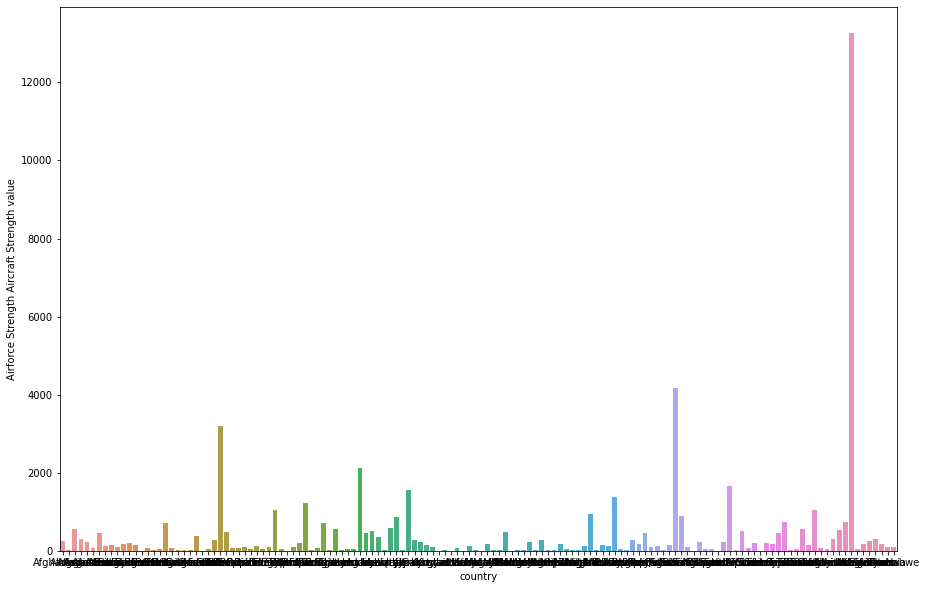

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(df2.country, df2["Airforce Strength Aircraft Strength value"])

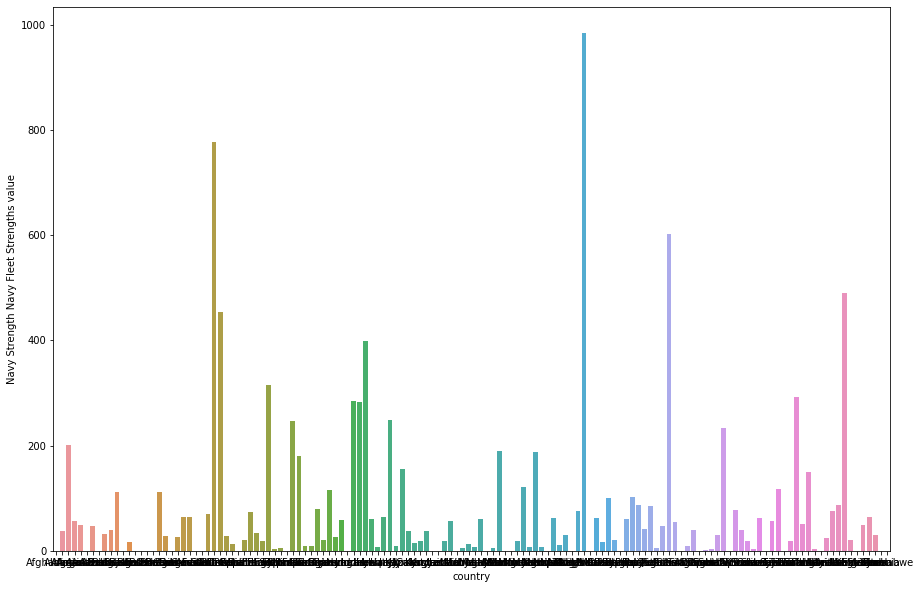

In [59]:
plt.figure(figsize=(15,10))
sns.barplot(df2["country"] , df2['Navy Strength Navy Fleet Strengths value'])
plt.show()

## Decriptive statistics

In [60]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Airforce Strength Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Airforce Strength Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Airforce Strength Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Airforce Strength Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Airforce Strength Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Airforce Strength Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Airforce Strength Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Land Strength Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
Land Strength AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


# Data Preprocessing

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

In [62]:
X = df2.drop(["country"], axis=1)

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [64]:
from pyclustertend import hopkins

In [65]:
hopkins(X, X.shape[0]) # It's look good under 0,5

0.07404957215719178

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [66]:
ssd = []

K = range(2,10)                                          # range for k

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)                                         # Train the model for each new k number.
    ssd.append(model.inertia_)

In [67]:
ssd

[1909.4825400661186,
 1294.9499703756715,
 1032.0768081318024,
 873.344701752121,
 700.9826518601566,
 596.8408007852493,
 498.2157649891474,
 440.83886497770044]

In [68]:
pd.Series(ssd).diff()

0           NaN
1   -614.532570
2   -262.873162
3   -158.732106
4   -172.362050
5   -104.141851
6    -98.625036
7    -57.376900
dtype: float64

In [69]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,614.532570
3,262.873162
4,158.732106
5,172.362050
6,104.141851
7,98.625036
8,57.376900


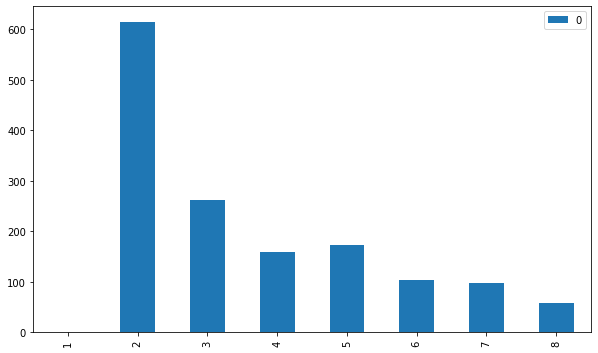

In [70]:
df_diff.plot(kind='bar');

Text(0.5, 1.0, 'elbow method')

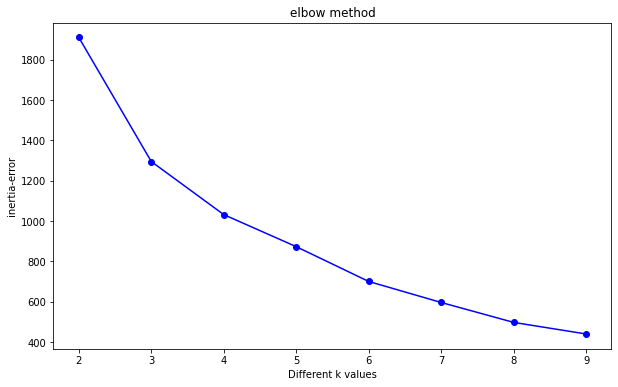

In [71]:
plt.plot(K, ssd, "bo-")                  # maybe we choose k = 3
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

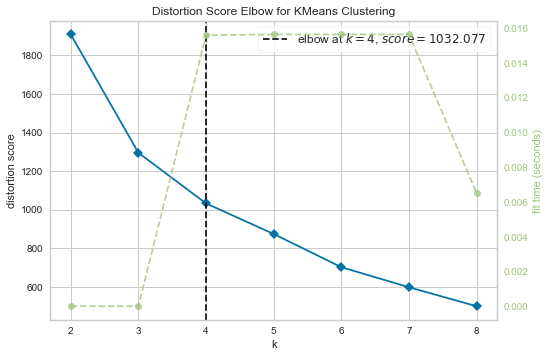

In [72]:
from yellowbrick.cluster import KElbowVisualizer                    # k = 4 for yellowbrick

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

### Model Building and label visualisation

In [73]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [74]:
model.inertia_

1032.0768081318024

In [75]:
model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 0, 1, 3,
       3, 0, 0, 3, 3, 3])

In [76]:
df2["cluster"] = model.labels_

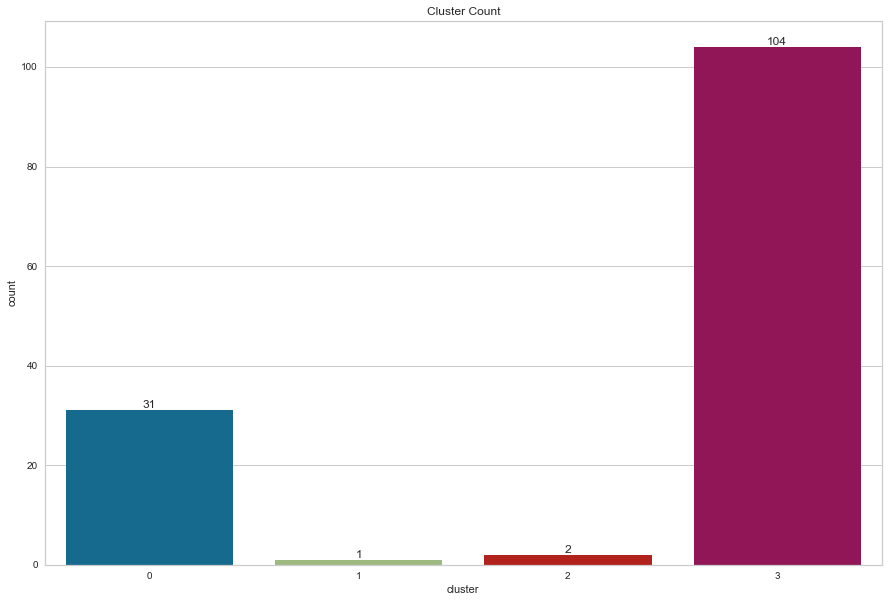

In [77]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax = sns.countplot(x = df2.cluster)

ax.bar_label(ax.containers[0])
plt.show();

### Evaluate 

In [78]:
from sklearn.metrics import silhouette_score

In [79]:
silhouette_score(X, model.labels_)

0.4956608189413284

In [80]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8193950812093086
For n_clusters=4, the silhouette score is 0.4956608189413284
For n_clusters=5, the silhouette score is 0.5177311271740322
For n_clusters=6, the silhouette score is 0.48669858072616184
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.47714406079950733


## Hierarchical Clustering

In [81]:
from pyclustertend import hopkins

### Dendogram

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [83]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

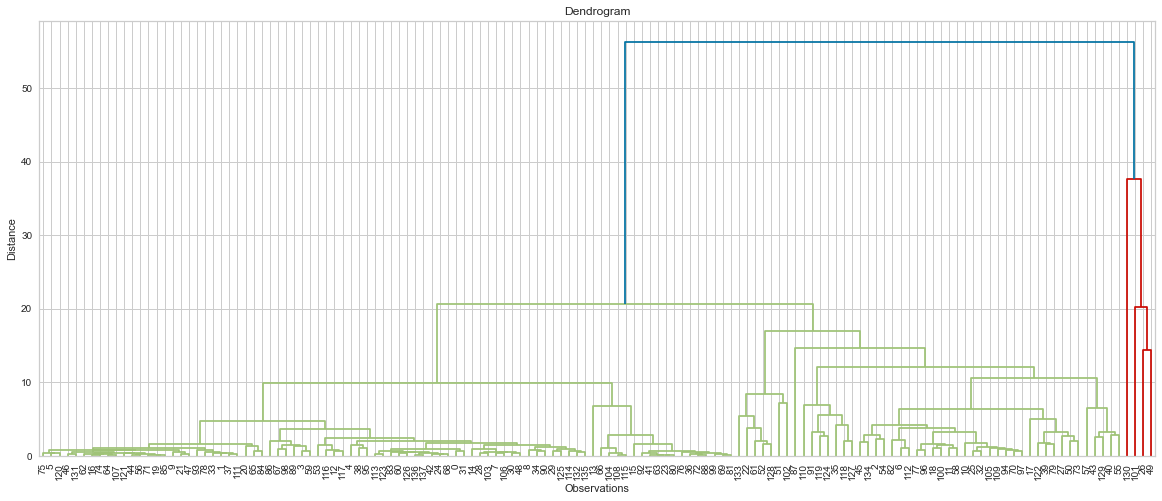

In [84]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

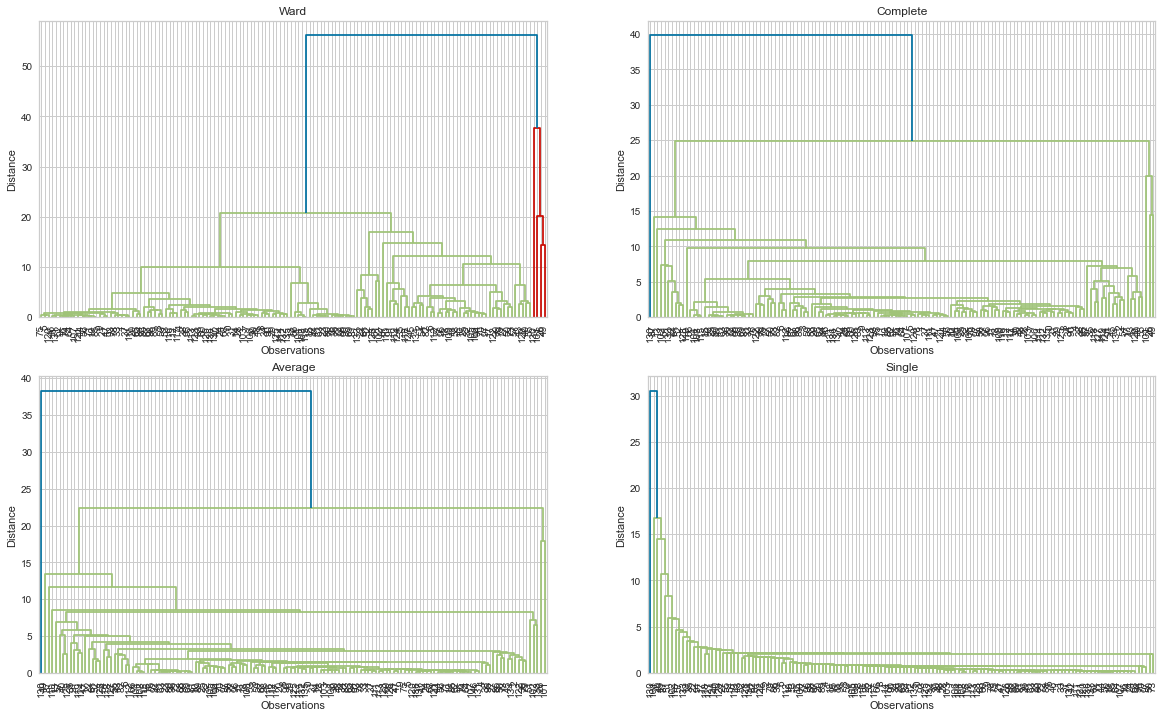

In [85]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

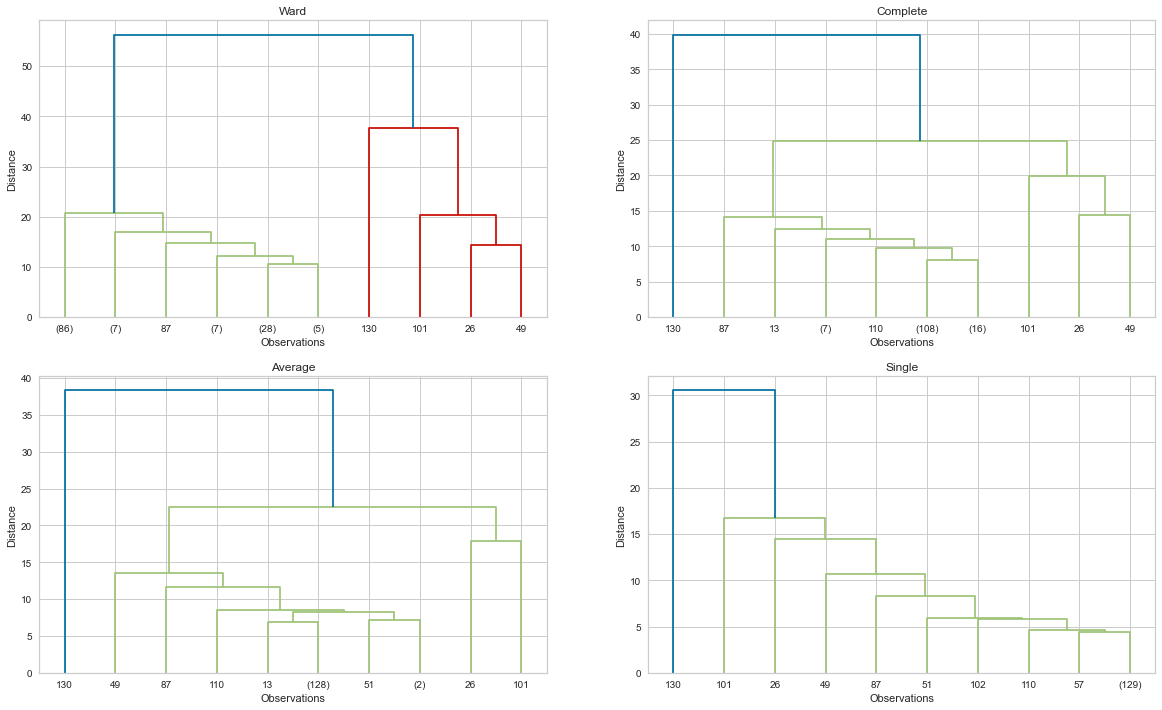

In [86]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [87]:
from sklearn.cluster import AgglomerativeClustering

In [88]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward") 
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [89]:
df2["cluster_1"] = model1.labels_

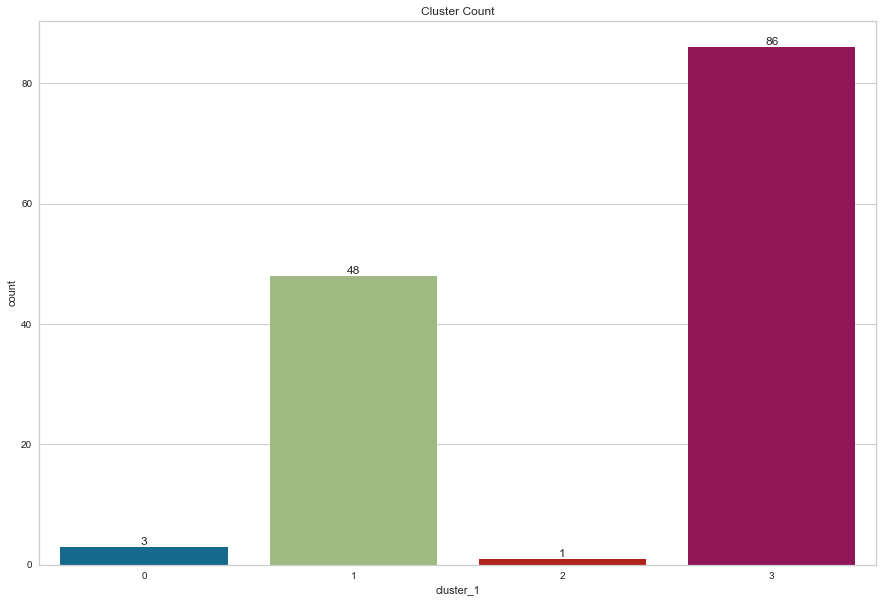

In [90]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax = sns.countplot(x = df2.cluster_1)

ax.bar_label(ax.containers[0])
plt.show();

### Evaluate 

In [91]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df2.cluster_1)}')

Silhouette Score(n=4): 0.3546913282067596
